0.2671353251318102
0.36731107205623903
0.46045694200351495
[INFO]:  4 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  10.441598415374756  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  34.57985041794985 % on  2273  instances
Labels:  ['2nd' '1st' '0th' '5th' '6th' '9th' '7th' '3rd' '4th' '8th']
Confusion matrix:  [[35, 23, 19, 18, 4, 1, 3, 23, 22, 3], [41, 96, 46, 6, 3, 0, 4, 38, 27, 3], [39, 63, 149, 8, 4, 5, 1, 32, 24, 3], [38, 19, 4, 81, 33, 11, 23, 33, 35, 14], [0, 0, 1, 12, 40, 9, 14, 2, 3, 14], [3, 1, 0, 20, 36, 142, 42, 8, 12, 81], [22, 9, 1, 43, 49, 32, 78, 9, 21, 37], [27, 22, 3, 17, 12, 2, 5, 58, 29, 2], [21, 5, 2, 26, 23, 10, 16, 25, 51, 10], [1, 0, 0, 7, 13, 20, 27, 2, 6, 56]]
Decision  2nd  => Accuray:  86.4496 %, Precision:  23.1788 %, Recall:  15.4185 %, F1:  18.5185 %
Decision  1st  => Accuray:  86.3616 %, Precision:  36.3636 %, Recall:  40.3361 %, F1: 

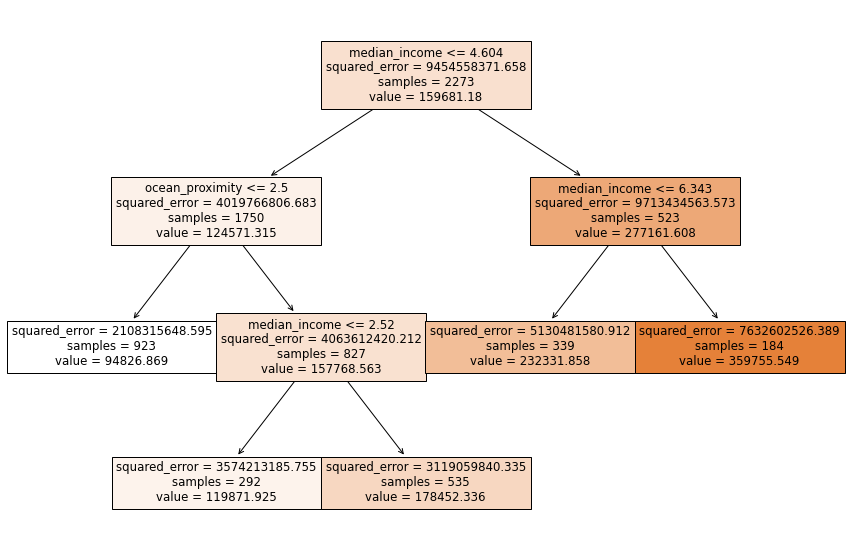

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

housing=pandas.read_csv('C:/Users/000110888/Desktop/housing_data.csv')
coding={'<1H OCEAN': 1, 'INLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4}
housing['ocean_proximity']=housing['ocean_proximity'].map(coding)
X=housing.iloc[:,0:7].values
y=housing.iloc[:,7].values

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=348644)

#FITTING REGRESSION TREE WITH RSS SPLITTING CRITERION
rtree = DecisionTreeRegressor(random_state=907420, 
criterion="squared_error", max_leaf_nodes=5)
reg_tree_RSS = rtree.fit(X_train, y_train)

#PLOTTING FITTED TREE
fig=plt.figure(figsize=(15,10))
fn=['housing_median_age','total_rooms','total_bedrooms','population',
'households','median_income','ocean_proximity']
tree.plot_tree(reg_tree_RSS, feature_names=fn, filled=True)

#COMPUTING PREDICTION ACCURACY FOR TESTING DATA
y_pred=reg_tree_RSS.predict(X_test)

ind10=[]
ind15=[]
ind20=[]     

for sub1, sub2 in zip(y_pred, y_test):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub2 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub2 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub2 else ind20.append(0)
 
prop10=sum(ind10)/len(ind10)
prop15=sum(ind15)/len(ind15)
prop20=sum(ind20)/len(ind20)

print(prop10)
print(prop15)
print(prop20)

############################################################################

#FITTING REGRESSION TREE WITH CHAID SPLITTING CRITERION

#SPLITTING RESPONSE VARIABLE INTO DECILES AND MAKING IT NOMINAL
housing['deciles']=pandas.qcut(housing['median_house_value'], 10, labels=False)
deciles_coding={0:'0th',1:'1st',2:'2nd',3:'3rd',4:'4th',5:'5th',6:'6th',7:'7th',8:'8th',9:'9th'}
housing['deciles']=housing['deciles'].map(deciles_coding)

X=housing.iloc[:,0:7].values
y=housing.iloc[:,7:9].values

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=348644)

X_train=pandas.DataFrame(X_train, columns=['housing_median_age','total_rooms',
'total_bedrooms','population','households','median_income','ocean_proximity'])
y_train=pandas.DataFrame(y_train[:,1], columns=['deciles'])
train_data=pandas.concat([X_train, y_train],axis=1)

#FITTING TREE
from chefboost import Chefboost

config={'algorithm': 'CHAID'}
tree_chaid=Chefboost.fit(train_data, config, target_label='deciles')

#USING FITTED MODEL TO PREDICT FOR TESTING DATA
X_test=pandas.DataFrame(X_test, columns=['housing_median_age','total_rooms',
'total_bedrooms','population','households','median_income','ocean_proximity'])

y_pred=[]
for i in range(len(y_test)):
    y_pred.append(Chefboost.predict(tree_chaid, X_test.iloc[i,:]))

#COMPUTING PREDICTION ACCURACY FOR TESTING DATA
y_test=pandas.DataFrame(y_test[:,0], columns=['median_house_value'])
y_pred=pandas.DataFrame(y_pred, columns=['predclass'])
pred_data=pandas.concat([y_test,y_pred],axis=1)

df_new=pred_data.groupby('predclass')['median_house_value'].mean()#predicted value=class mean
inner_join = pandas.merge(pred_data, df_new, on='predclass', how ='inner')

ind10=[]
ind15=[]
ind20=[]     
#median_house_value_x=observed value, median_house_value_y=predicted value
for sub1, sub2 in zip(inner_join['median_house_value_x'], inner_join['median_house_value_y']):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub1 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub1 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub1 else ind20.append(0)
 
prop10=sum(ind10)/len(ind10)
prop15=sum(ind15)/len(ind15)
prop20=sum(ind20)/len(ind20)

print(prop10)
print(prop15)
print(prop20)

